<a href="https://colab.research.google.com/github/IgorRachev27/Homework/blob/main/hw%209_10%20gradient%20and%20ml/HW_lessons_9_10%20(%D1%87%D1%83%D1%82%D1%8C%20%D1%83%D0%BB%D1%83%D1%87%D1%88%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82%203%D0%B3%D0%BE%20%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

In [1]:
import numpy as np

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

In [2]:
def f(x):
    return x[0]**2+5*x[1]**2

def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

In [3]:
# В точке (0,0)
def grad_descent_const_step(x = np.array([0, 0]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуск с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [4]:
x = grad_descent_const_step(alpha = 0.1)

Градиентный спуск с постоянным шагом выполнил 3 шагов
Точка с координатами х1 = 0.0, x2 = 0.0


In [5]:
# В точке (2,1)
def grad_descent_const_step(x = np.array([0, 0]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуск с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [6]:
x = grad_descent_const_step(alpha = 0.01)

Градиентный спуск с постоянным шагом выполнил 3 шагов
Точка с координатами х1 = 0.0, x2 = 0.0


In [7]:
x = grad_descent_const_step(alpha = 0.11)

Градиентный спуск с постоянным шагом выполнил 3 шагов
Точка с координатами х1 = 0.0, x2 = 0.0


In [8]:
# В точке (1,-10)
def grad_descent_const_step(x = np.array([1, -10]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуск с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [9]:
x = grad_descent_const_step(alpha = 0.01)

Градиентный спуск с постоянным шагом выполнил 185 шагов
Точка с координатами х1 = 0.02381354235199539, x2 = -3.426606593921723e-08


In [10]:
def grad_descent_step_splitting(x = np.array([0, 0]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуск с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [11]:
a = grad_descent_step_splitting()

Градиентный спуск с дроблением шага выполнил 3 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0, x2 = 0


In [12]:
def grad_descent_step_splitting(x = np.array([1, 1]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуск с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [13]:
a = grad_descent_step_splitting()

Градиентный спуск с дроблением шага выполнил 13 шагов
Выполнено 27 итераций дробления шага
Точка с координатами х1 = 0.0034938588036157476, x2 = -0.000215883766723314


In [14]:
a = grad_descent_step_splitting(alpha=0.011)

Градиентный спуск с дроблением шага выполнил 169 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.023295200841418555, x2 = 2.7984085754536114e-09


In [15]:
a = grad_descent_step_splitting(alpha=2)

Градиентный спуск с дроблением шага выполнил 12 шагов
Выполнено 29 итераций дробления шага
Точка с координатами х1 = 0.0035031101757865197, x2 = -0.0007918635222898736


In [16]:
a = grad_descent_step_splitting(alpha=6)

Градиентный спуск с дроблением шага выполнил 12 шагов
Выполнено 41 итераций дробления шага
Точка с координатами х1 = 0.0023561084794047377, x2 = -0.00023333304618823977


### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

In [17]:
def grad_descent_cosine(T,M,x = np.array([0, 0]), alpha= 0.01, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    t=1
    fin=[]
    for i in range(M):
        while (np.linalg.norm(grad) > epsilon) or (check<3):
            alpha=alpha/2*(np.cos((np.pi*np.mod(t-1, (T/M)))/(T/M))+1)
            x = x - alpha*grad
            grad = grad_f(x)
            n+=1
            t+=1
            if (np.linalg.norm(grad) <= epsilon): check +=1
            if t>1000: #это условие было добавлено потому, что из-за резкого уменьшения alpha
                       # цикл "while" может никогда не кончиться т.к. условие никогда не станет False
                break
        
        alpha=0.5
        t=1

        print('Проход № ', i+1)
        print("Градиентный спуск выполнил {} шагов".format(n))
        n=0
        print("Точка с координатами х1 = {}, x2 = {} ".format(x[0], x[1]))
        fin.append(x)
    return fin

In [18]:
a = grad_descent_cosine(T=10,M=5, alpha=0.5)

Проход №  1
Градиентный спуск выполнил 3 шагов
Точка с координатами х1 = 0.0, x2 = 0.0 
Проход №  2
Градиентный спуск выполнил 0 шагов
Точка с координатами х1 = 0.0, x2 = 0.0 
Проход №  3
Градиентный спуск выполнил 0 шагов
Точка с координатами х1 = 0.0, x2 = 0.0 
Проход №  4
Градиентный спуск выполнил 0 шагов
Точка с координатами х1 = 0.0, x2 = 0.0 
Проход №  5
Градиентный спуск выполнил 0 шагов
Точка с координатами х1 = 0.0, x2 = 0.0 


### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

In [19]:
def f(x):
    return x[0]**4+5*x[1]**3-7*x[2]**2-np.log(x[3]+1)-x[0]+2*x[1]**2

def grad_f(x):
    return np.array([4*x[0]**3-1, 15*x[1]**2+4*x[1], 14*x[2], 1/(x[3]+1)])

In [20]:
def grad_descent_cosine(T,M,x = np.array([0, 0, 0, 0]), alpha= 0.01, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    t=1
    fin=[]
    for i in range(M):
        while (np.linalg.norm(grad) > epsilon) or (check<3):
            alpha=alpha/2*(np.cos((np.pi*np.mod(t-1, (T/M)))/(T/M))+1)
            x = x - alpha*grad
            grad = grad_f(x)
            n+=1
            t+=1
            if (np.linalg.norm(grad) <= epsilon): check +=1
            if t>1000: #это условие было добавлено потому, что из-за резкого уменьшения alpha
                       # цикл "while" может никогда не кончиться т.к. условие никогда не станет False
                break
        
        alpha=0.5
        t=1

        print('Проход № ', i+1)
        print("Градиентный спуск выполнил {} шагов".format(n))
        n=0
        print("Точка с координатами х1 = {}, x2 = {}, x3 = {}, x4 = {}".format(x[0], x[1], x[2], x[3]))
        fin.append(x)
    return fin

In [21]:
a = grad_descent_cosine(T=10,M=4, alpha=0.5)

Проход №  1
Градиентный спуск выполнил 1000 шагов
Точка с координатами х1 = 0.651175593052168, x2 = 0.0, x3 = 0.0, x4 = -1.4917315684203147
Проход №  2
Градиентный спуск выполнил 1000 шагов
Точка с координатами х1 = 0.6395170379910909, x2 = 0.0, x3 = 0.0, x4 = -0.35321711701658237
Проход №  3
Градиентный спуск выполнил 1000 шагов
Точка с координатами х1 = 0.6345213224457845, x2 = 0.0, x3 = 0.0, x4 = 1.4298099119598306
Проход №  4
Градиентный спуск выполнил 1000 шагов
Точка с координатами х1 = 0.6321848885124215, x2 = 0.0, x3 = 0.0, x4 = 1.0346134551544048


### Задание 4.
Случайная величина X задана следующей функцией распределения:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. Однако 2ой пункт задания (на нахождение производной) должен быть расписан!

In [22]:
import seaborn as sns
import pandas as pd

Постройте данную функцию распределения при помощи библиотеки seaborn

In [23]:
def f(x):
    y=[]
    for i in x:
        if i<=np.pi:
            y.append(0)
        elif i>np.pi and i<=1.5*np.pi:
            y.append(-np.cos(i))
        else:
            y.append(0)
    return np.array(y)

In [24]:
x = np.arange(0, 2*np.pi, 0.01)

In [25]:
a=pd.Series(data=f(x),index=x)

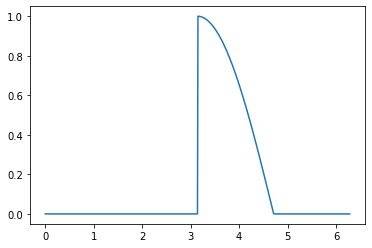

In [26]:
sns.lineplot(data=a)

Найдите плотность вероятности. 

In [27]:
# плотность вероятности f'(x)=(-cos(x))'=-(-sin(x))=sin(x) при np.pi<x<=1.5*np.pi, в остальных случаях 0
def dif(x):
    y=[]
    for i in x:
        if i<=np.pi:
            y.append(0)
        elif i>np.pi and i<=1.5*np.pi:
            y.append(np.sin(i))
        else:
            y.append(0)
    return np.array(y)

Постройте график полученной плотности вероятности 

In [28]:
x = np.arange(0, 2*np.pi, 0.01)
a=pd.Series(data=dif(x),index=x)

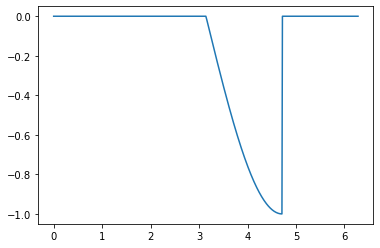

In [29]:
sns.lineplot(data=a)

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$

поскольку функция кусочная, полученное из вольфрама значение ∫(sin(x)) {5/4*π, π}=0.29289 -неправильно.
В нашем случае ∫sin(x) dx {np.pi<x<1.5*np.pi} = 1.
Для подсчёта вероятности не будем мучаться с сложением кусков интегралов, а воспользуемся формулой F(a)-F(b)

In [30]:
def f(i):
    if i<=np.pi:
        return 0
    elif i>np.pi and i<=1.5*np.pi:
        return -np.cos(i)
    else:
        return 0

In [31]:
f(5/4*np.pi)-f(np.pi)

0.7071067811865477

Найти математическое ожидание и дисперсию случайной величины X 

In [32]:
'''
из вольфрама
M(X)=∫-cos(x)*x dx {π,5/4*π}=2.4839

для расчёта дисперсии:
M(X**2)=∫(-cos(x))*x^2 dx {π,5/4*π}=8.7607

D(X)=M[(X−M(X))^2]=M(X^2)−(M(X))^2.
D(X)=8.7607-2.4839**2=2.5909
'''

'\nиз вольфрама\nM(X)=∫-cos(x)*x dx {π,5/4*π}=2.4839\n\nдля расчёта дисперсии:\nM(X**2)=∫(-cos(x))*x^2 dx {π,5/4*π}=8.7607\n\nD(X)=M[(X−M(X))^2]=M(X^2)−(M(X))^2.\nD(X)=8.7607-2.4839**2=2.5909\n'

In [33]:
D=8.7607-2.4839**2
D

2.5909407899999986

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


In [34]:
def f(x):
    y=[]
    for i in x:
        if i<=1:
            y.append(0)
        elif i>1 and i<=2:
            y.append(i-1)
        else:
            y.append(1)
    return np.array(y)

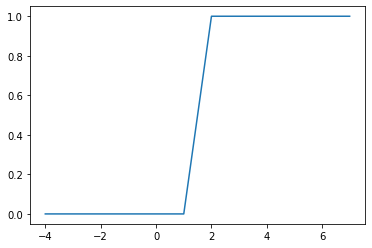

In [35]:
x=np.arange(-4,7,0.01)

a=pd.Series(f(x),index=x)
sns.lineplot(data=a)

Ответ: Да, случайная величина Х непрерывна

In [36]:
# плотность
def P(x):
    y=[]
    for i in x:
        if i<=1:
            y.append(0)
        elif i>1 and i<=2:
            y.append(1)
        else:
            y.append(0)
    return np.array(y)    

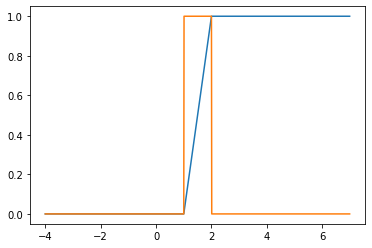

In [37]:
x=np.arange(-4,7,0.01)

b=pd.Series(P(x),index=x)
sns.lineplot(data=a)
sns.lineplot(data=b)

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

In [38]:
# TP/(TP+FP)
precision=90/(90+20)
precision

0.8181818181818182

In [39]:
# TP/(TP+FN)
recall=90/(90+10)
recall

0.9

In [40]:
F1=2*precision*recall/(precision+recall)
F1

0.8571428571428572